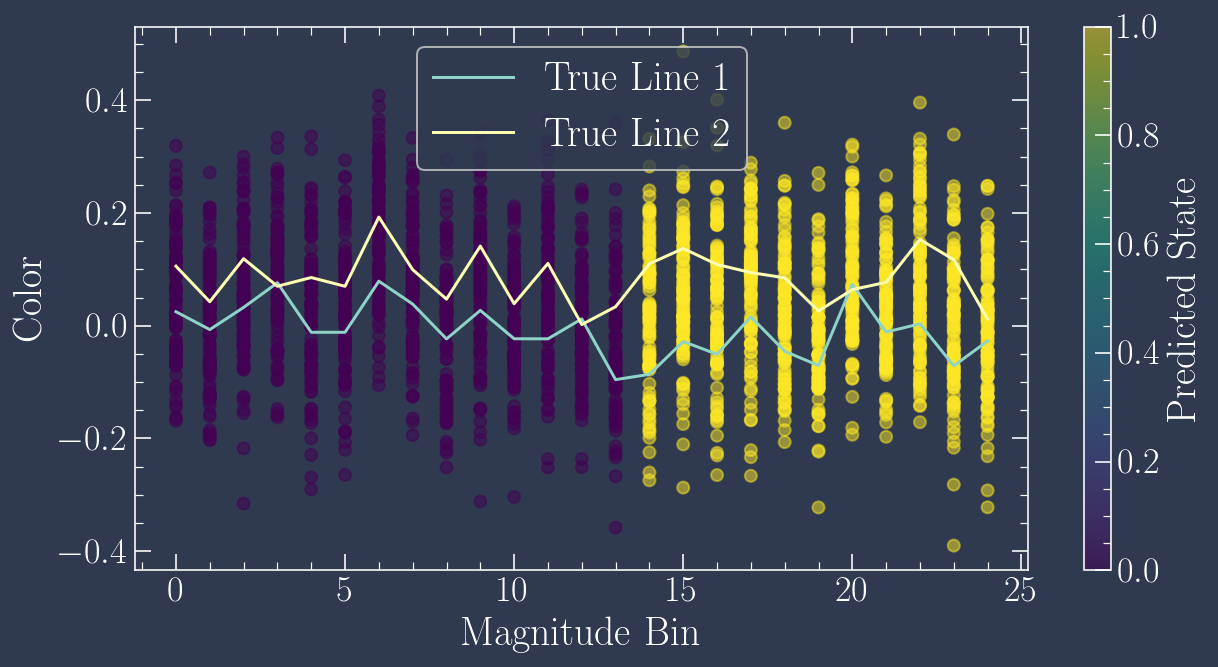

In [6]:
import numpy as np
from hmmlearn import hmm
import matplotlib.pyplot as plt

# Generate synthetic CMD data (in reality, you would use your actual data)
np.random.seed(42)
n_bins = 25 # Number of magnitude bins
n_stars = 100  # Number of stars per bin
n_states = 2  # Number of fiducial lines

# Synthetic fiducial lines
true_lines = np.zeros((n_states, n_bins))
for i in range(n_states):
    true_lines[i] = 0.1 * i + np.random.normal(0, 0.05, size=n_bins)

# Generate synthetic CMD data around the fiducial lines
data = []
for i_bin in range(n_bins):
    for i_star in range(n_stars):
        i_state = np.random.choice(n_states)  # Randomly choose a fiducial line
        color = true_lines[i_state, i_bin] + np.random.normal(0, 0.1)  # Generate a color around the fiducial line
        data.append([i_bin, color])
data = np.array(data)

# Create and train the HMM
model = hmm.GaussianHMM(n_components=n_states, covariance_type="full", n_iter=100)
model.fit(data)

# Predict the states for each data point
predicted_states = model.predict(data)

# Plot the true lines, the data, and the predicted states
plt.figure(figsize=(10, 5))
for i in range(n_states):
    plt.plot(true_lines[i], label=f'True Line {i+1}')
plt.scatter(data[:, 0], data[:, 1], c=predicted_states, cmap='viridis', alpha=0.5)
plt.colorbar(label='Predicted State')
plt.xlabel('Magnitude Bin')
plt.ylabel('Color')
plt.legend()
plt.show()
